**#Section A — Loading the Dataset**

In this section, the Air Quality dataset is loaded into a Pandas DataFrame. <br>
The dataset is taken from the UCI Machine Learning Repository ([link](https://archive.ics.uci.edu/dataset/360/air+quality)).<br>
It contains hourly measurements of pollutants and sensor responses recorded in an Italian city.

The data is stored in a CSV file with semicolon (;) separators, and missing values are encoded as -200, which will be handled during the preprocessing stage. Also the last rows are empty, so they would be displayed as NaN, the same thing with the last 2 columns

In [1]:
import pandas as pd

df = pd.read_csv("dataset/AirQualityUCI.csv", sep=';')

df.head

<bound method NDFrame.head of             Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1  

**Dataset Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


****

**#Section B — Exploratory Data Analysis**

In this section, we explore the structure of the dataset, examine statistical properties of each variable, and visualize relationships and distributions.<br>
Each step includes justification to demonstrate why it is relevant for understanding the data before modeling.

**Summary Statistics**

Summary statistics provide insight into the central tendency (mean, median), spread (standard deviation), and range of numerical features.
They help detect anomalies, outliers, and unusual distributions, and guide preprocessing decisions such as scaling, imputation, and transformation.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0,1053.0,1221.0,2040.0
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0,-200.0,-200.0,1189.0
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0,895.0,1105.0,2214.0
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0,141.0,284.0,1479.0
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0,794.0,960.0,2683.0
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0,96.0,133.0,340.0
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0,1446.0,1662.0,2775.0
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0,942.0,1255.0,2523.0
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Distribution of Numerical Features**

Understanding variable distributions is essential for:
- identifying skewed variables
- detecting outliers
- choosing appropriate scaling methods
- understanding pollutant behavior over time

We plot histograms for all numerical features.

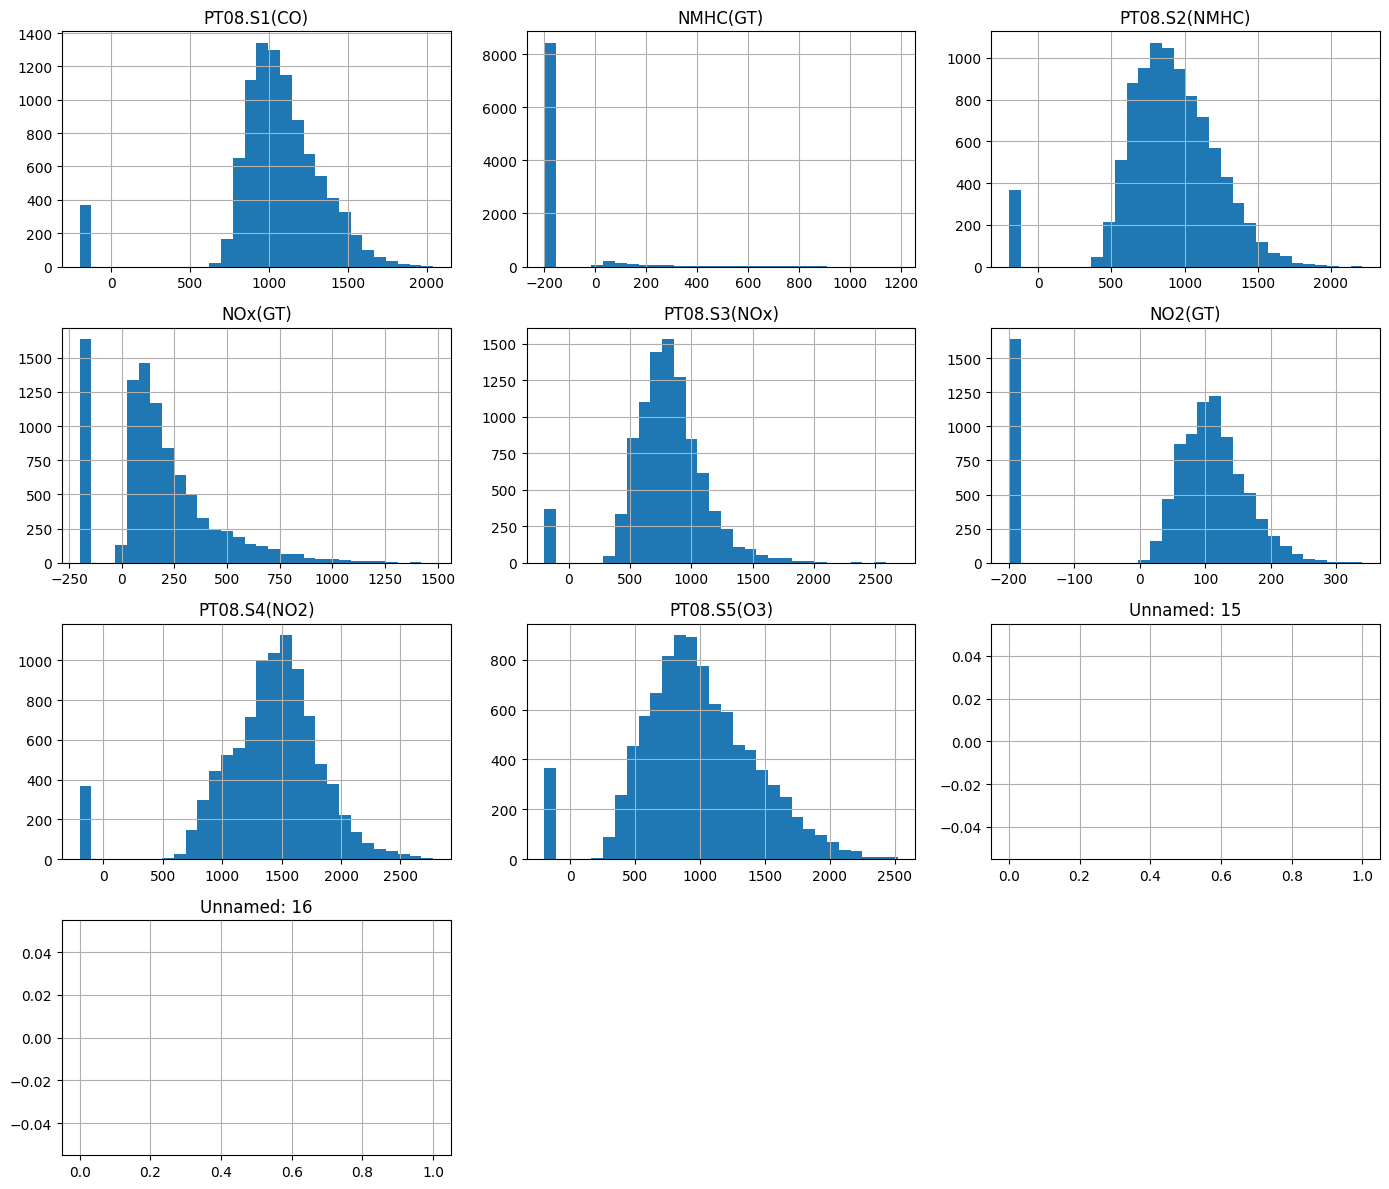

In [11]:
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['float64', 'int64'])

df_numeric.hist(figsize=(14, 12), bins=30)
plt.tight_layout()
plt.show()

**Boxplots**

Boxplots help visualize outliers and variability in each feature.<br>
This is important because outliers may result from sensor malfunction, extreme pollution events, or incorrect recordings.

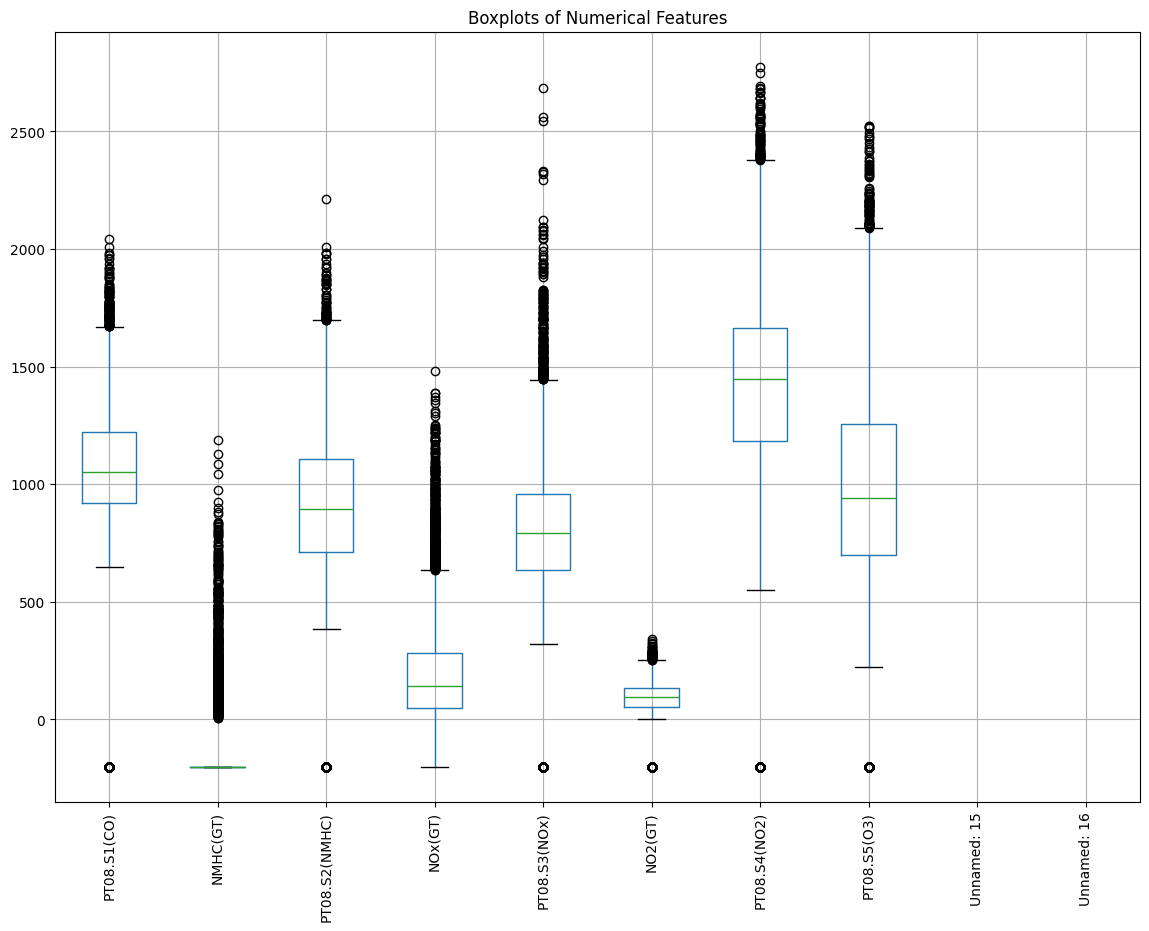

In [14]:
plt.figure(figsize=(14, 10))
df_numeric.boxplot(rot=90)
plt.title("Boxplots of Numerical Features")
plt.show()

**Correlation Matrix**

Correlation analysis helps identify:
- relationships between sensors and actual pollutant concentrations
- multicollinearity (important for linear models)
- which features may be strong predictors

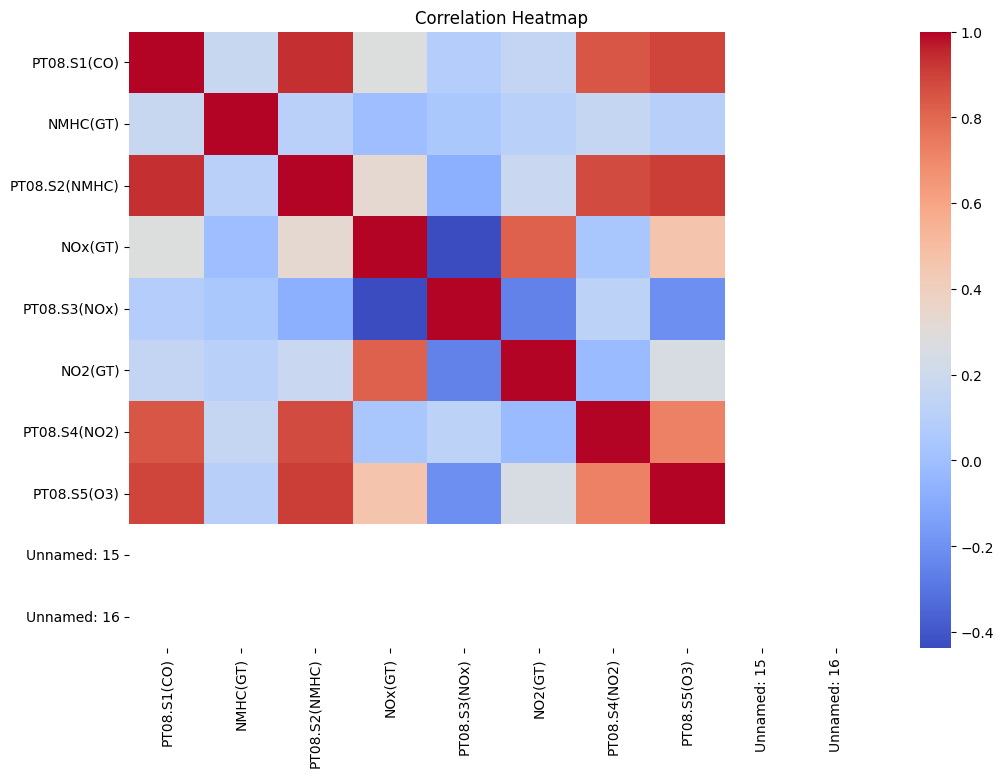

In [15]:
plt.figure(figsize=(12, 8))
corr = df_numeric.corr()

import seaborn as sns
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Sensor-to-Pollutant Relationships**

Scatterplots help determine whether sensor readings have linear or non-linear relationships with pollutant concentrations.<br>
These visualizations justify the choice of algorithms in later modeling steps.

We plot sensors vs. typical target variables.

TypeError: 'value' must be an instance of str or bytes, not a float

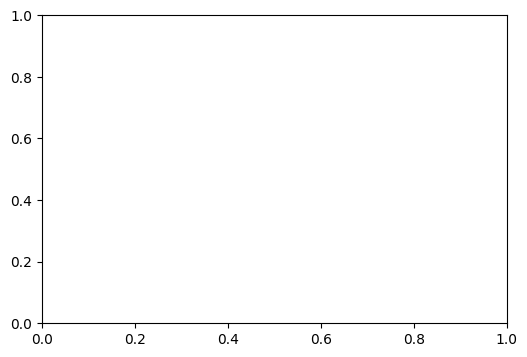

In [16]:
targets = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)']

for target in targets:
    df.plot(kind='scatter', x='PT08.S1(CO)', y=target, figsize=(6, 4), title=f'PT08.S1(CO) vs {target}')
    plt.show()